# DR History Analysis

This script looks at DR event logs from 2011 through 2023. The goal is to inform maximum DR participation estimates. I am primarily concerned with the frequency and type of DLRP events by network in order to understand if there are any generalizable characteristics of networks with immediate or contingent DLRP events.

## Notes
* Network tiers shift slightly year to year, so it can't be relied on for an analysis
* Some years have different asterisk meanings. See this document for details https://www.coned.com/-/media/files/coned/documents/save-energy-money/rebates-incentives-tax-credits/smart-usage-rewards/demand-response-events.pdf?la=en
* Brownsville Networks = Crown Heights, Richmond Hill, Ridgewood

In [91]:
import pandas as pd
import matplotlib.pyplot as plt  # for visualization
from datetime import datetime

## Load Data

In [92]:
# read in hardware data to dataframe
networks_df = pd.read_csv('data/conEdNetworks2024.csv')

networks_df.head()

,borough,network,start time,end time,tier
0,bronx,central bronx,16:00,20:00,2
1,bronx,fordham,16:00,20:00,2
2,bronx,northeast bronx,16:00,20:00,2
3,bronx,riverdale,16:00,20:00,2
4,bronx,southeast bronx,16:00,20:00,2


In [93]:
networks_df.shape

(83, 5)

In [94]:
# list(networks_df[networks_df['network']=='fordham']['borough'])[0]

In [95]:
#get list of non-manhattan networks
nM = list(networks_df[networks_df['borough']!= 'manhattan']['network'])

In [96]:
# read in logs to dataframe

log_df = pd.read_csv('data/DR-activitylog-cleaned.csv')

#convert event dates to datetime format
log_df['Event Date'] = pd.to_datetime(log_df['Event Date'])

print(log_df.shape)
log_df.head()

(865, 9)


,Event Date,Administrator,Program,Start Time,End Time,Event Duration,Zone/Network,Event/Test,Event Type
0,2011-06-08,Con Edison,DLC,15:00,16:00,1:00,All,Test,NaN
1,2011-06-08,Con Edison,DLRP,15:00,16:00,1:00,All,Test,NaN
2,2011-06-08,Con Edison,RSAP,16:00,17:00,1:00,Zone J,Test,NaN
3,2011-06-09,Con Edison,CSRP,14:00,15:00,1:00,All,Test,NaN
4,2011-06-09,Con Edison,CSRP,17:00,18:00,1:00,All,Test,NaN


In [97]:
# filter out all NYISO
flog_df = log_df[log_df['Administrator']=='Con Edison']
print(flog_df.shape)

#filter out tests
flog_df = flog_df[log_df['Event/Test']!='Test']
print(flog_df.shape)
flog_df.head()

(779, 9)
(696, 9)


C:\Users\Alex\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Event Date,Administrator,Program,Start Time,End Time,Event Duration,Zone/Network,Event/Test,Event Type
7,2011-07-21,Con Edison,DLC,13:00,18:00,5:00,All,Event,NaN
8,2011-07-21,Con Edison,RSAP,11:00,19:00,8:00,Zone J,Event,NaN
9,2011-07-21,Con Edison,CSRP-Day,12:00,17:00,5:00,All,Event,NaN
10,2011-07-21,Con Edison,CSRP-Night,17:00,22:00,5:00,All,Event,NaN
13,2011-07-22,Con Edison,DLC,7:00,15:00,8:00,Elmsford,Event,NaN


## DLRP analysis

In [98]:
#filter out non DLRP events
dlog_df = flog_df[flog_df['Program'].isin(['DLRP'])]

print(dlog_df.shape)
dlog_df.head()

(157, 9)


,Event Date,Administrator,Program,Start Time,End Time,Event Duration,Zone/Network,Event/Test,Event Type
25,2011-07-22,Con Edison,DLRP,7:00,15:00,8:00,Elmsford,Event,NaN
26,2011-07-22,Con Edison,DLRP,7:00,15:00,8:00,Maspeth,Event,NaN
27,2011-07-22,Con Edison,DLRP,18:00,23:00,5:00,Richmond Hill,Event,NaN
28,2011-07-22,Con Edison,DLRP,18:00,23:00,5:00,Fox Hills,Event,NaN
29,2011-07-22,Con Edison,DLRP,18:00,23:00,5:00,Sheepshead Bay,Event,NaN


In [99]:
#filter out NaN event types
dlog_df = dlog_df[flog_df['Event Type'].notnull()]

print(dlog_df.shape)
dlog_df.head()

(121, 9)


C:\Users\Alex\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Event Date,Administrator,Program,Start Time,End Time,Event Duration,Zone/Network,Event/Test,Event Type
171,2016-07-15,Con Edison,DLRP,14:00,20:00,6:00,Fresh Kills,Event,Immediate
173,2016-07-22,Con Edison,DLRP,17:00,23:00,6:00,Fox Hills,Event,Immediate
174,2016-07-23,Con Edison,DLRP,22:00,0:00,2:00,Triboro,Event,Immediate
176,2016-07-24,Con Edison,DLRP,6:00,10:00,4:00,Riverdale,Event,Contingency
195,2016-08-11,Con Edison,DLRP,14:00,20:00,6:00,Crown Heights,Event,Contingency


In [100]:
#args: list of networks
brownsvilleNetworks = ['Crown Heights', 'Richmond Hill', 'Ridgewood']
def getUnique(l):
    nL = []
    #loop through list
    for n in l:
        #replace Brownsville group with actual network names
        if n == 'Brownsville*':
            for b in brownsvilleNetworks :
                if b not in nL:
                    nL.append(b)
#         elif n == 'All^':
#             #in 2019 All^ exlcludes Manhattan, Borough Hall, and Brownsville
#             #in 2020 All^ excludes Brownsville Networks
#         elif n == 'Non-Manhattan**':
#             #in 2019 Non-Manhattan** excludes Brownsville (BQDM) networks
#             #in 2020 Non-Manhattan** excludes Borough Hall
#             nM
#         elif n == 'Non-Manhattan***':
#             #in 2020 Non-Manhattan*** includes Washington Heights in Manhattan. Excludes Borough Hall
        else:
            if n not in nL:
                nL.append(n)
        
    return nL
        

In [101]:
#list of networks that have had DLRP events of either type
uN = getUnique(dlog_df['Zone/Network'].unique())
print(len(uN))
uN

36


['Fresh Kills',
 'Fox Hills',
 'Triboro',
 'Riverdale',
 'Crown Heights',
 'Ridgewood',
 'Richmond Hill',
 'Sheepshead Bay',
 'Williamsburg',
 'Prospect Park',
 'Central Park',
 'Madison Square',
 'Cooper Square',
 'Willowbrook',
 'All^',
 'Flatbush',
 'Wainwright',
 'Bay Ridge',
 'Rego Park',
 'Non-Manhattan**',
 'Maspeth',
 'Southeast Bronx',
 'Non-Manhattan***',
 'Borough Hall',
 'Yorkville',
 'Jamaica',
 'City Hall',
 'Ossining West',
 'Park Slope',
 'Central Bronx',
 'Cedar Street',
 'Washington Street',
 'Elmsford 2',
 'Jackson Heights',
 'Borden',
 'Sunnyside']

### Analysis of Immediate Events

In [102]:
#immediate events
#filter out NaN event types
elog_df = dlog_df[flog_df['Event Type']=='Immediate']
print(len(elog_df['Zone/Network'].unique()))
print(elog_df['Zone/Network'].unique())
elog_df.head()

22
['Fresh Kills' 'Fox Hills' 'Triboro' 'Williamsburg' 'Prospect Park'
 'Willowbrook' 'Flatbush' 'Bay Ridge' 'Southeast Bronx' 'Yorkville'
 'Maspeth' 'Central Park' 'Jamaica' 'Rego Park' 'City Hall'
 'Ossining West' 'Ridgewood' 'Central Bronx' 'Cedar Street'
 'Washington Street' 'Elmsford 2' 'Jackson Heights']


C:\Users\Alex\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,Event Date,Administrator,Program,Start Time,End Time,Event Duration,Zone/Network,Event/Test,Event Type
171,2016-07-15,Con Edison,DLRP,14:00,20:00,6:00,Fresh Kills,Event,Immediate
173,2016-07-22,Con Edison,DLRP,17:00,23:00,6:00,Fox Hills,Event,Immediate
174,2016-07-23,Con Edison,DLRP,22:00,0:00,2:00,Triboro,Event,Immediate
215,2016-08-12,Con Edison,DLRP,17:00,22:00,5:00,Fox Hills,Event,Immediate
216,2016-08-12,Con Edison,DLRP,16:00,0:00,8:00,Fresh Kills,Event,Immediate


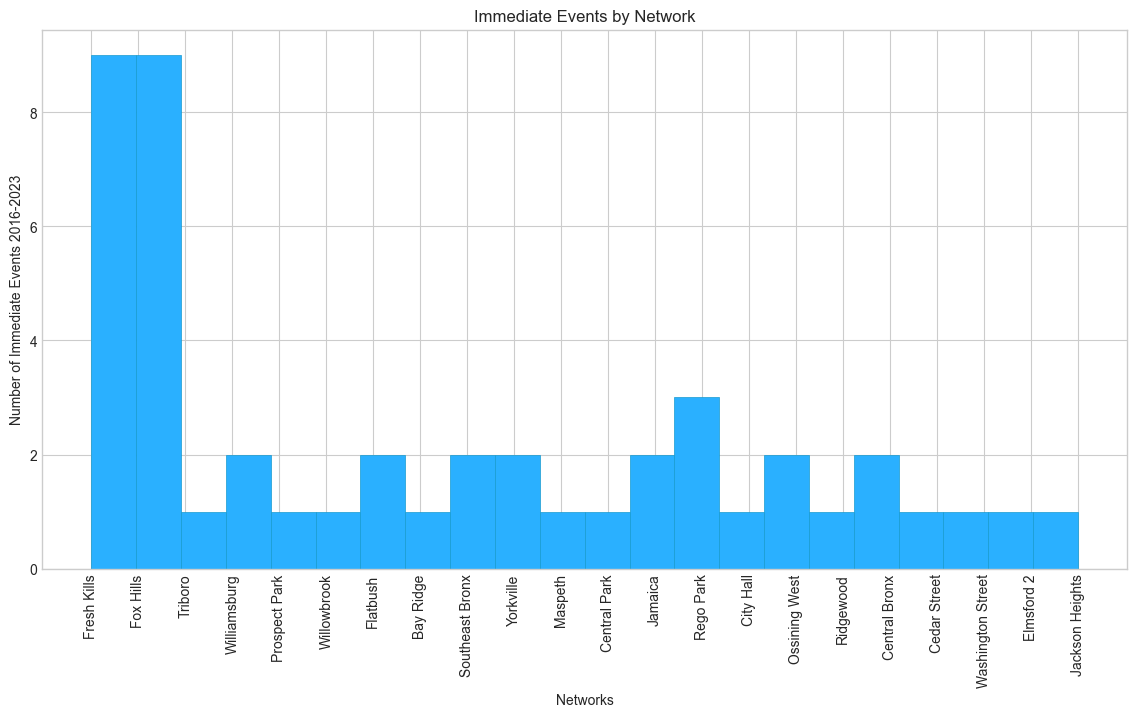

In [103]:
# Histogram of networks with DLRP events

plt.figure(figsize=(14,7)) # Make it 14x7 inch
plt.style.use('seaborn-whitegrid') # nice and clean grid
plt.hist(elog_df['Zone/Network'], bins=len(elog_df['Zone/Network'].unique()), facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.title('Immediate Events by Network') 
plt.xlabel('Networks') 
plt.xticks(rotation='vertical')
plt.ylabel('Number of Immediate Events 2016-2023') 
plt.show()

C:\Users\Alex\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


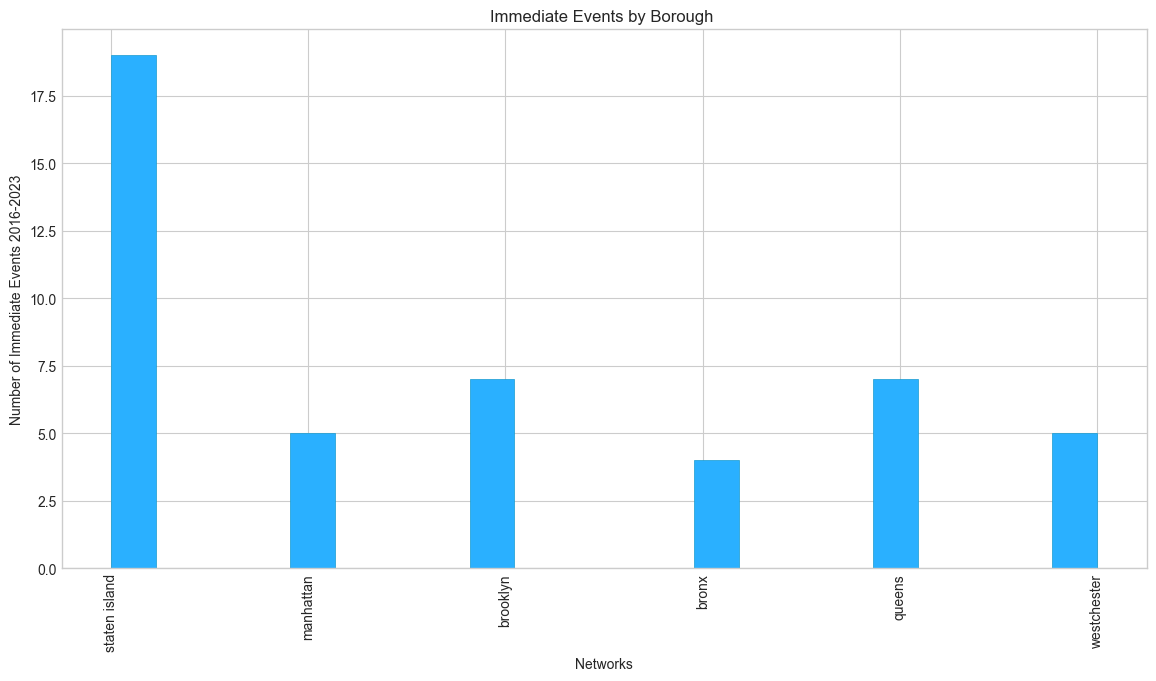

In [104]:
bL = []
for r in range(elog_df.shape[0]):
    mn = elog_df.iloc[r]['Zone/Network'].lower()
    mb = list(networks_df[networks_df['network']==mn]['borough'])[0]    
    bL.append(mb)
             
elog_df['borough'] = bL

plt.figure(figsize=(14,7)) # Make it 14x7 inch
plt.style.use('seaborn-whitegrid') # nice and clean grid
plt.hist(elog_df['borough'], bins=len(elog_df['Zone/Network'].unique()), facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.title('Immediate Events by Borough ') 
plt.xlabel('Networks') 
plt.xticks(rotation='vertical')
plt.ylabel('Number of Immediate Events 2016-2023') 
plt.show()

In [105]:
#investigate staten island events
elog_df[elog_df['borough'] == 'staten island']


,Event Date,Administrator,Program,Start Time,End Time,Event Duration,Zone/Network,Event/Test,Event Type,borough
171,2016-07-15,Con Edison,DLRP,14:00,20:00,6:00,Fresh Kills,Event,Immediate,staten island
173,2016-07-22,Con Edison,DLRP,17:00,23:00,6:00,Fox Hills,Event,Immediate,staten island
215,2016-08-12,Con Edison,DLRP,17:00,22:00,5:00,Fox Hills,Event,Immediate,staten island
216,2016-08-12,Con Edison,DLRP,16:00,0:00,8:00,Fresh Kills,Event,Immediate,staten island
231,2016-08-13,Con Edison,DLRP,14:00,22:00,8:00,Fox Hills,Event,Immediate,staten island
232,2016-08-13,Con Edison,DLRP,14:00,22:00,8:00,Fresh Kills,Event,Immediate,staten island
296,2018-05-03,Con Edison,DLRP,16:00,22:00,6:00,Fox Hills,Event,Immediate,staten island
305,2018-06-18,Con Edison,DLRP,17:00,23:00,6:00,Fox Hills,Event,Immediate,staten island
420,2019-07-17,Con Edison,DLRP,17:00,23:00,6:00,Fox Hills,Event,Immediate,staten island
421,2019-07-17,Con Edison,DLRP,17:00,23:00,6:00,Willowbrook,Event,Immediate,staten island


C:\Users\Alex\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


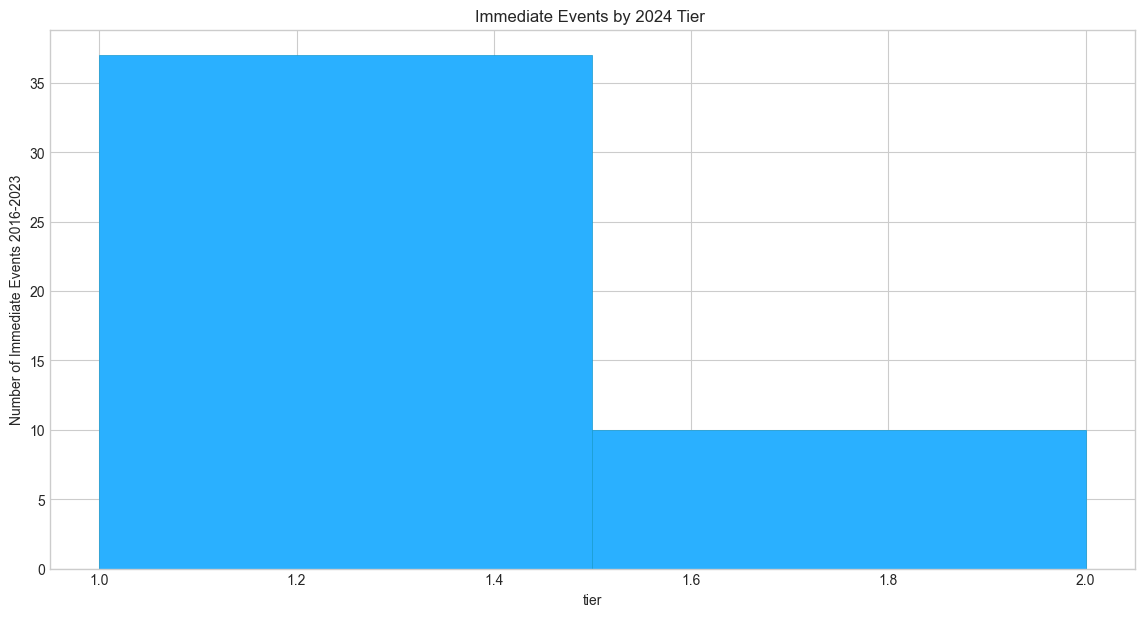

In [106]:
tL = []
for r in range(elog_df.shape[0]):
    mn = elog_df.iloc[r]['Zone/Network'].lower()
    mb = list(networks_df[networks_df['network']==mn]['tier'])[0]    
    tL.append(mb)
             
elog_df['tier'] = tL
#elog_df.head()

plt.figure(figsize=(14,7)) # Make it 14x7 inch
plt.style.use('seaborn-whitegrid') # nice and clean grid
plt.hist(elog_df['tier'], bins=2, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.title('Immediate Events by 2024 Tier ') 
plt.xlabel('tier') 
# plt.xticks(rotation='vertical')
plt.ylabel('Number of Immediate Events 2016-2023') 
plt.show()

In [107]:
#convert start times to datetime format
elog_df['DT Format'] = pd.to_datetime(elog_df['Start Time'], format='%H:%M')
elog_df['Start Time Float'] = elog_df['DT Format'].dt.hour + (elog_df['DT Format'].dt.minute/60)
#convert to float
elog_df['Start Time Float'].apply(lambda x: float(x))

elog_df.head()

C:\Users\Alex\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Alex\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Event Date,Administrator,Program,Start Time,End Time,Event Duration,Zone/Network,Event/Test,Event Type,borough,tier,DT Format,Start Time Float
171,2016-07-15,Con Edison,DLRP,14:00,20:00,6:00,Fresh Kills,Event,Immediate,staten island,1,1900-01-01 14:00:00,14.0
173,2016-07-22,Con Edison,DLRP,17:00,23:00,6:00,Fox Hills,Event,Immediate,staten island,1,1900-01-01 17:00:00,17.0
174,2016-07-23,Con Edison,DLRP,22:00,0:00,2:00,Triboro,Event,Immediate,manhattan,1,1900-01-01 22:00:00,22.0
215,2016-08-12,Con Edison,DLRP,17:00,22:00,5:00,Fox Hills,Event,Immediate,staten island,1,1900-01-01 17:00:00,17.0
216,2016-08-12,Con Edison,DLRP,16:00,0:00,8:00,Fresh Kills,Event,Immediate,staten island,1,1900-01-01 16:00:00,16.0


In [118]:
display(elog_df)

,Event Date,Administrator,Program,Start Time,End Time,Event Duration,Zone/Network,Event/Test,Event Type,borough,tier,DT Format,Start Time Float,Month
171,2016-07-15,Con Edison,DLRP,14:00,20:00,6:00,Fresh Kills,Event,Immediate,staten island,1,1900-01-01 14:00:00,14.0,7
173,2016-07-22,Con Edison,DLRP,17:00,23:00,6:00,Fox Hills,Event,Immediate,staten island,1,1900-01-01 17:00:00,17.0,7
174,2016-07-23,Con Edison,DLRP,22:00,0:00,2:00,Triboro,Event,Immediate,manhattan,1,1900-01-01 22:00:00,22.0,7
215,2016-08-12,Con Edison,DLRP,17:00,22:00,5:00,Fox Hills,Event,Immediate,staten island,1,1900-01-01 17:00:00,17.0,8
216,2016-08-12,Con Edison,DLRP,16:00,0:00,8:00,Fresh Kills,Event,Immediate,staten island,1,1900-01-01 16:00:00,16.0,8
231,2016-08-13,Con Edison,DLRP,14:00,22:00,8:00,Fox Hills,Event,Immediate,staten island,1,1900-01-01 14:00:00,14.0,8
232,2016-08-13,Con Edison,DLRP,14:00,22:00,8:00,Fresh Kills,Event,Immediate,staten island,1,1900-01-01 14:00:00,14.0,8
265,2017-06-19,Con Edison,DLRP,16:00,22:00,6:00,Williamsburg,Event,Immediate,brooklyn,2,1900-01-01 16:00:00,16.0,6
266,2017-06-19,Con Edison,DLRP,16:00,22:00,6:00,Prospect Park,Event,Immediate,brooklyn,1,1900-01-01 16:00:00,16.0,6
296,2018-05-03,Con Edison,DLRP,16:00,22:00,6:00,Fox Hills,Event,Immediate,staten island,1,1900-01-01 16:00:00,16.0,5


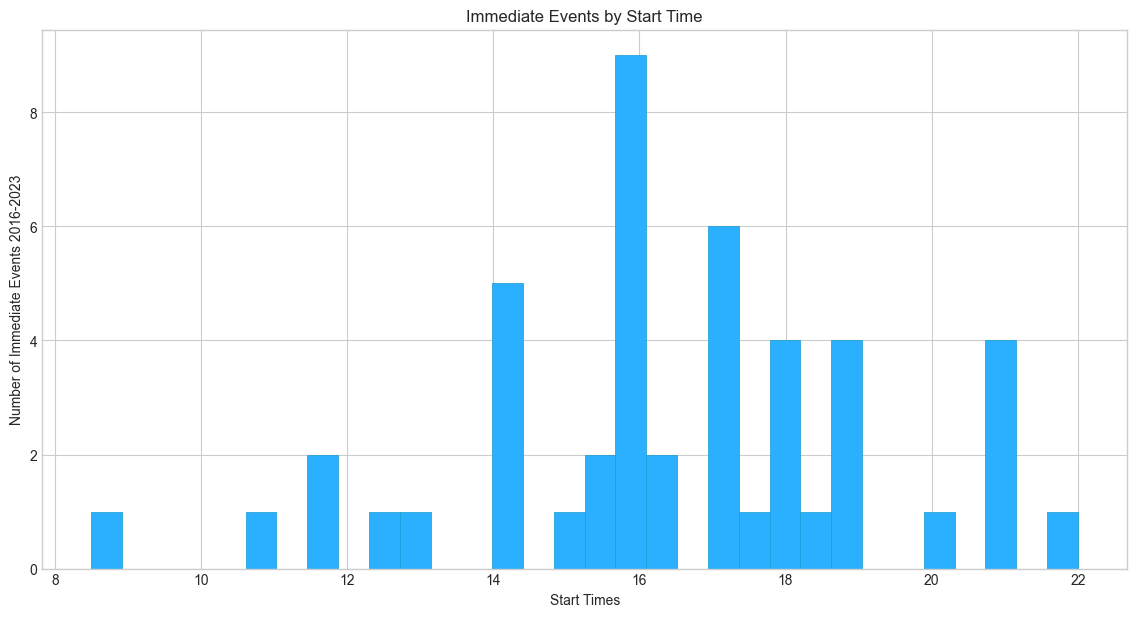

In [108]:
plt.figure(figsize=(14,7)) # Make it 14x7 inch
plt.style.use('seaborn-whitegrid') # nice and clean grid
plt.hist(elog_df['Start Time Float'], bins=32, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.title('Immediate Events by Start Time') 
plt.xlabel('Start Times') 
#plt.xticks(elog_df['Start Time Float'])
plt.ylabel('Number of Immediate Events 2016-2023') 
plt.show()

C:\Users\Alex\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


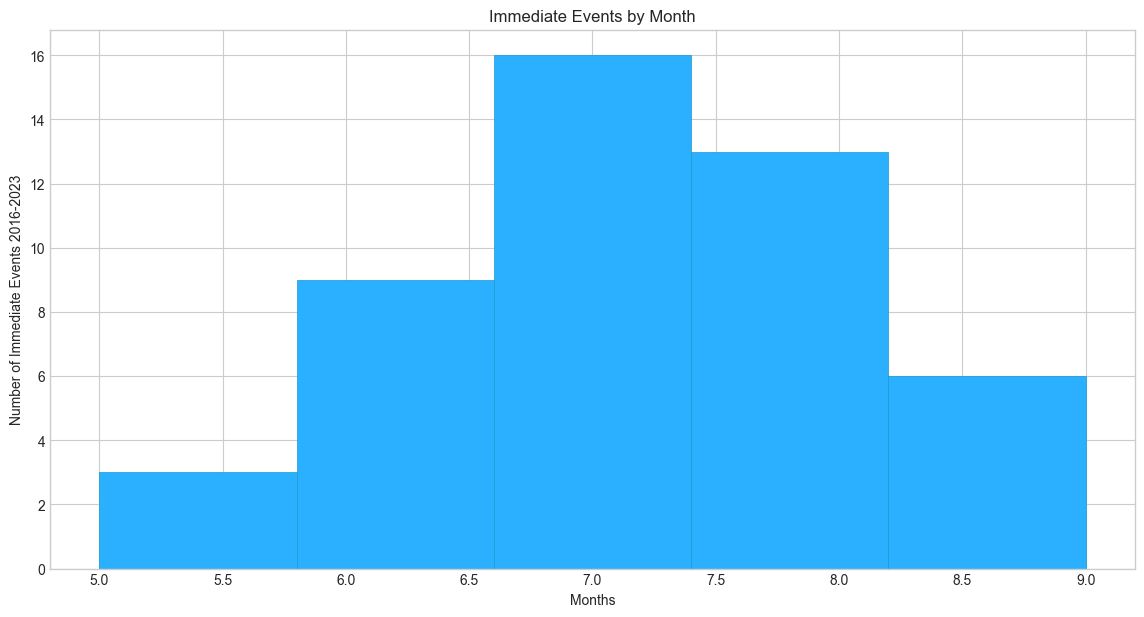

In [109]:
#events by month
elog_df['Month'] = elog_df['Event Date'].dt.month
#elog_df.head()

plt.figure(figsize=(14,7)) # Make it 14x7 inch
plt.style.use('seaborn-whitegrid') # nice and clean grid
plt.hist(elog_df['Month'], bins=5, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.title('Immediate Events by Month') 
plt.xlabel('Months') 
plt.ylabel('Number of Immediate Events 2016-2023') 
plt.show()

In [110]:
#years in which immediate events occurred

#the average time off from the scheduled time
networks_df['immediate years'] = pd.Series()
#the number of immediate events
networks_df['immediate count'] = 0

iE = {}
for r in range(elog_df.shape[0]):
    n = elog_df.iloc[r]['Zone/Network'].lower()
    #s = float(elog_df.iloc[r]['Start Time Float'])
    #nS = networks_df[networks_df['network']==n]['start time float'].iloc[0]#.loc['start time float']
    #v = abs(s - nS)
    eY = elog_df['Event Date'].iloc[r].year
    networks_df.loc[networks_df['network']==n,'immediate count']= networks_df.loc[networks_df['network']==n,'immediate count'] + 1
    if n in iE.keys():
        iE[n].append(eY)
    else:
        iE[n] = [eY]

for n in iE.keys():
    #get unique years
    u = []
    [u.append(x) for x in iE[n] if x not in u]
    networks_df.loc[networks_df['network']==n,'immediate years']= len(u)

print(iE)
networks_df[networks_df['immediate count'] > 0]


{'fresh kills': [2016, 2016, 2016, 2021, 2022, 2022, 2023, 2023, 2023], 'fox hills': [2016, 2016, 2016, 2018, 2018, 2019, 2022, 2023, 2023], 'triboro': [2016], 'williamsburg': [2017, 2021], 'prospect park': [2017], 'willowbrook': [2019], 'flatbush': [2019, 2021], 'bay ridge': [2019], 'southeast bronx': [2020, 2022], 'yorkville': [2021, 2021], 'maspeth': [2021], 'central park': [2021], 'jamaica': [2021, 2022], 'rego park': [2021, 2022, 2023], 'city hall': [2022], 'ossining west': [2022, 2022], 'ridgewood': [2022], 'central bronx': [2022, 2023], 'cedar street': [2022], 'washington street': [2023], 'elmsford 2': [2023], 'jackson heights': [2023]}


C:\Users\Alex\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


,borough,network,start time,end time,tier,immediate years,immediate count
0,bronx,central bronx,16:00,20:00,2,2.0,2
4,bronx,southeast bronx,16:00,20:00,2,2.0,2
6,brooklyn,bay ridge,14:00,18:00,1,1.0,1
10,brooklyn,flatbush,16:00,20:00,1,2.0,2
13,brooklyn,prospect park,16:00,20:00,1,1.0,1
14,brooklyn,ridgewood,19:00,23:00,2,1.0,1
16,brooklyn,williamsburg,14:00,18:00,2,2.0,2
21,manhattan,central park,16:00,20:00,1,1.0,1
23,manhattan,city hall,14:00,18:00,1,1.0,1
52,manhattan,triboro,14:00,18:00,1,1.0,1


In [117]:
iNetworks = networks_df[networks_df['immediate count'] > 0]
print(iNetworks.shape[0])
print(iNetworks['immediate years'].mean())
print('1 year: ' + str(iNetworks[iNetworks['immediate years']==1].shape[0]))
print('2 year: ' + str(iNetworks[iNetworks['immediate years']==2].shape[0]))
print('3 year: ' + str(iNetworks[iNetworks['immediate years']==3].shape[0]))
print('4 year: ' + str(iNetworks[iNetworks['immediate years']==4].shape[0]))
print('5 year: ' + str(iNetworks[iNetworks['immediate years']==5].shape[0]))

22
1.6363636363636365
1 year: 14
2 year: 5
3 year: 1
4 year: 1
5 year: 1


### Analysis of Contingent Events

In [19]:
#contingency events
#filter out non DLRP events
clog_df = flog_df[flog_df['Program'].isin(['DLRP'])]

#filter out NaN event types
clog_df = clog_df[clog_df['Event Type']=='Contingency']
print(len(clog_df['Zone/Network'].unique()))
clog_df['Zone/Network'].unique()

25


array(['Riverdale', 'Crown Heights', 'Ridgewood', 'Richmond Hill',
       'Sheepshead Bay', 'Williamsburg', 'Prospect Park', 'Central Park',
       'Madison Square', 'Cooper Square', 'Brownsville*', 'All^',
       'Flatbush', 'Willowbrook', 'Wainwright', 'Rego Park',
       'Non-Manhattan**', 'Maspeth', 'Non-Manhattan***', 'Borough Hall',
       'Bay Ridge', 'Fresh Kills', 'Park Slope', 'Fox Hills', 'Jamaica'],
      dtype=object)

In [20]:
uC = getUnique(clog_df['Zone/Network'].unique())
print(len(uC))
uC

24


['Riverdale',
 'Crown Heights',
 'Ridgewood',
 'Richmond Hill',
 'Sheepshead Bay',
 'Williamsburg',
 'Prospect Park',
 'Central Park',
 'Madison Square',
 'Cooper Square',
 'All^',
 'Flatbush',
 'Willowbrook',
 'Wainwright',
 'Rego Park',
 'Non-Manhattan**',
 'Maspeth',
 'Non-Manhattan***',
 'Borough Hall',
 'Bay Ridge',
 'Fresh Kills',
 'Park Slope',
 'Fox Hills',
 'Jamaica']

In [21]:
#all contingency events do have consistent start times
clog_df[clog_df['Zone/Network'].isin(['All','All^','Non-Manhattan**','Non-Manhattan***','Brownsville*'])].iloc[0:15]

,Event Date,Administrator,Program,Start Time,End Time,Event Duration,Zone/Network,Event/Test,Event Type
417,2019-07-17,Con Edison,DLRP,18:00,0:00,6:00,Brownsville*,Event,Contingency
433,2019-07-19,Con Edison,DLRP,18:00,0:00,6:00,Brownsville*,Event,Contingency
440,2019-07-20,Con Edison,DLRP,11:00,15:00,4:00,All^,Event,Contingency
441,2019-07-20,Con Edison,DLRP,14:00,18:00,4:00,All^,Event,Contingency
442,2019-07-20,Con Edison,DLRP,16:00,20:00,4:00,All^,Event,Contingency
443,2019-07-20,Con Edison,DLRP,19:00,23:00,4:00,All^,Event,Contingency
455,2019-07-20,Con Edison,DLRP,18:00,0:00,6:00,Brownsville*,Event,Contingency
462,2019-07-21,Con Edison,DLRP,11:00,15:00,4:00,All^,Event,Contingency
463,2019-07-21,Con Edison,DLRP,14:00,18:00,4:00,All^,Event,Contingency
464,2019-07-21,Con Edison,DLRP,16:00,20:00,4:00,All^,Event,Contingency


In [22]:
display(clog_df)

,Event Date,Administrator,Program,Start Time,End Time,Event Duration,Zone/Network,Event/Test,Event Type
176,2016-07-24,Con Edison,DLRP,6:00,10:00,4:00,Riverdale,Event,Contingency
195,2016-08-11,Con Edison,DLRP,14:00,20:00,6:00,Crown Heights,Event,Contingency
196,2016-08-11,Con Edison,DLRP,14:00,20:00,6:00,Ridgewood,Event,Contingency
197,2016-08-11,Con Edison,DLRP,14:00,20:00,6:00,Richmond Hill,Event,Contingency
201,2016-08-12,Con Edison,DLRP,14:00,20:00,6:00,Crown Heights,Event,Contingency
...,...,...,...,...,...,...,...,...,...
675,2021-08-27,Con Edison,DLRP,16:00,22:00,6:00,Cooper Square,Event,Contingency
721,2022-07-24,Con Edison,DLRP,16:00,20:00,4:00,Flatbush,Event,Contingency
727,2022-07-25,Con Edison,DLRP,14:00,18:00,4:00,Park Slope,Event,Contingency
794,2023-07-06,Con Edison,DLRP,10:00,16:00,6:00,Fox Hills,Event,Contingency


In [23]:
#drop duplicates for 'All^' events
prevAllDate=0
dropList = []
for a in range(clog_df.shape[0]):
    if clog_df.iloc[a]['Zone/Network']=='All^':
        if clog_df.iloc[a]['Event Date'] == prevAllDate:
            di =  clog_df.iloc[a]
            dropList.append(clog_df.iloc[a].name)
        else:
            prevAllDate = clog_df.iloc[a]['Event Date']


print(dropList)
#clog_df =
clog_df.drop(dropList, inplace=True)
clog_df[clog_df['Zone/Network'].isin(['All','All^','Non-Manhattan**','Non-Manhattan***','Brownsville*'])]

[441, 442, 443, 463, 464, 465]


,Event Date,Administrator,Program,Start Time,End Time,Event Duration,Zone/Network,Event/Test,Event Type
417,2019-07-17,Con Edison,DLRP,18:00,0:00,6:00,Brownsville*,Event,Contingency
433,2019-07-19,Con Edison,DLRP,18:00,0:00,6:00,Brownsville*,Event,Contingency
440,2019-07-20,Con Edison,DLRP,11:00,15:00,4:00,All^,Event,Contingency
455,2019-07-20,Con Edison,DLRP,18:00,0:00,6:00,Brownsville*,Event,Contingency
462,2019-07-21,Con Edison,DLRP,11:00,15:00,4:00,All^,Event,Contingency
477,2019-07-21,Con Edison,DLRP,18:00,0:00,6:00,Brownsville*,Event,Contingency
480,2019-07-22,Con Edison,DLRP,18:00,0:00,6:00,Brownsville*,Event,Contingency
519,2020-06-25,Con Edison,DLRP,16:00,22:00,6:00,Brownsville*,Event,Contingency
522,2020-06-26,Con Edison,DLRP,16:00,22:00,6:00,Brownsville*,Event,Contingency
526,2020-06-27,Con Edison,DLRP,18:00,22:00,4:00,Brownsville*,Event,Contingency


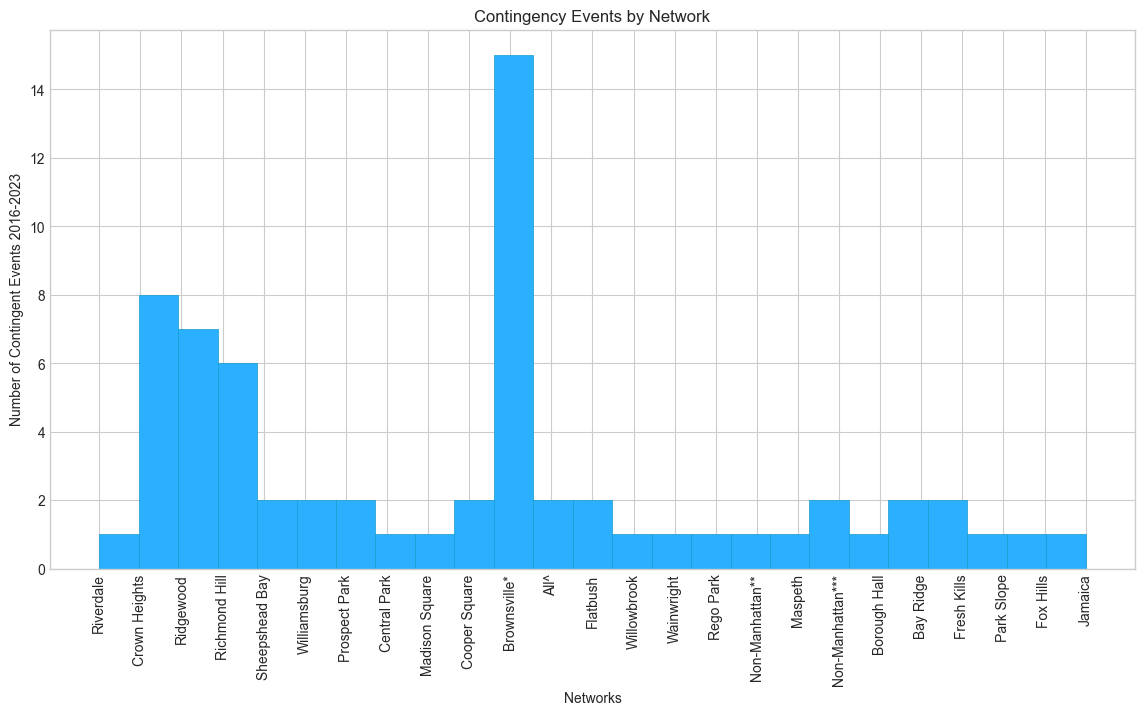

In [24]:
# Histogram of networks with DLRP events
plt.figure(figsize=(14,7)) # Make it 14x7 inch
plt.style.use('seaborn-whitegrid') # nice and clean grid
plt.hist(clog_df['Zone/Network'], bins=len(clog_df['Zone/Network'].unique()), facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.title('Contingency Events by Network') 
plt.xlabel('Networks') 
plt.xticks(rotation='vertical')
plt.ylabel('Number of Contingent Events 2016-2023') 
plt.show()

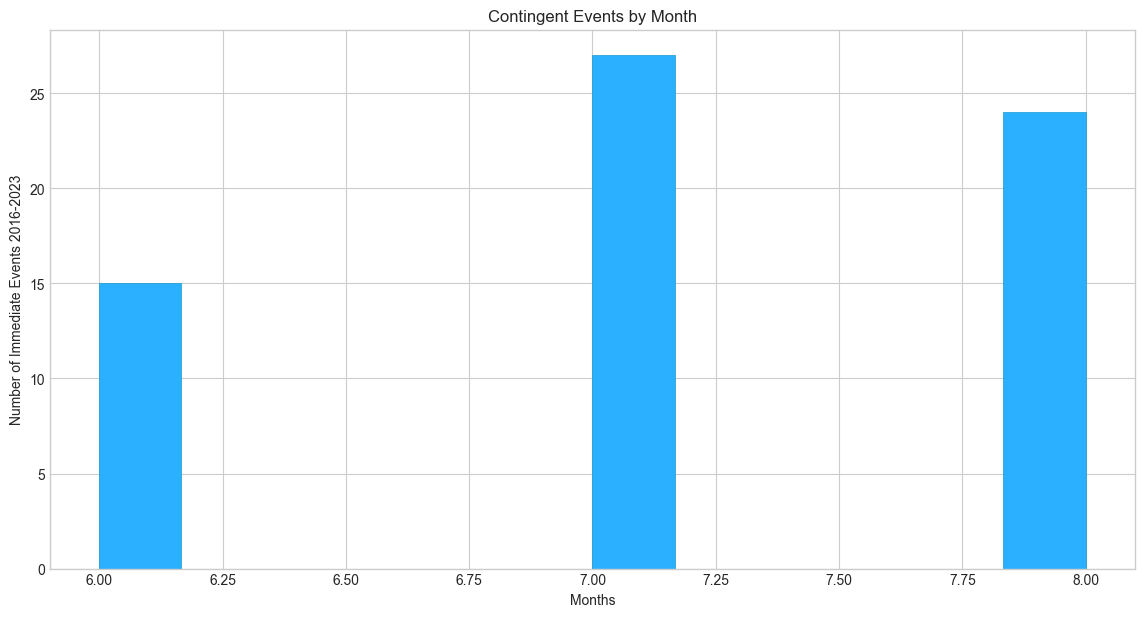

In [25]:
#events by month
clog_df['Month'] = clog_df['Event Date'].dt.month
#elog_df.head()

plt.figure(figsize=(14,7)) # Make it 14x7 inch
plt.style.use('seaborn-whitegrid') # nice and clean grid
plt.hist(clog_df['Month'], bins=12, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.title('Contingent Events by Month') 
plt.xlabel('Months') 
plt.ylabel('Number of Immediate Events 2016-2023') 
plt.show()

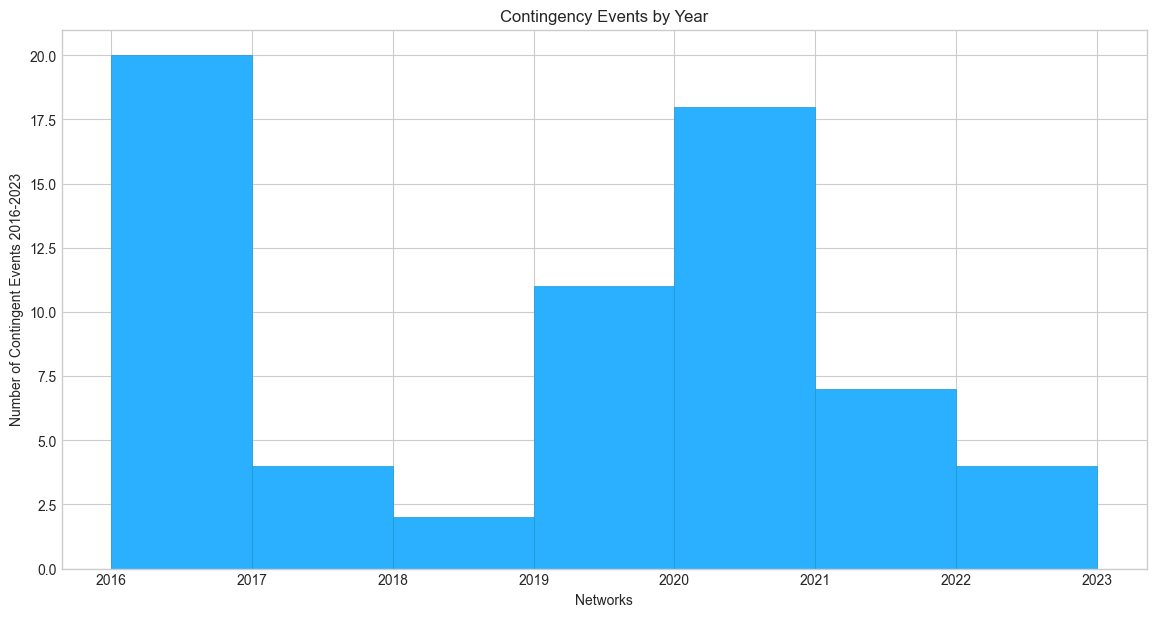

In [26]:
plt.figure(figsize=(14,7)) # Make it 14x7 inch
plt.style.use('seaborn-whitegrid') # nice and clean grid
plt.hist(clog_df['Event Date'].dt.year, bins=7, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.title('Contingency Events by Year') 
plt.xlabel('Networks') 
#plt.xticks(rotation='vertical')
plt.ylabel('Number of Contingent Events 2016-2023') 
plt.show()

In [27]:
#get the individual network contingency events
iclog_df = clog_df[~clog_df['Zone/Network'].isin(['All','All^','Non-Manhattan**','Non-Manhattan***','Brownsville*'])]
#iclog_df

In [28]:
#convert start times to datetime format
iclog_df['DT Format'] = pd.to_datetime(iclog_df['Start Time'], format='%H:%M')
iclog_df['Start Time Float'] = iclog_df['DT Format'].dt.hour + (iclog_df['DT Format'].dt.minute/60)
#convert to float
iclog_df['Start Time Float'].apply(lambda x: float(x))

#the average time off from the scheduled time
networks_df['contingent avg variance'] = pd.Series()
#the number of contingent events
networks_df['contingent count'] = 0

variances = {}
for r in range(iclog_df.shape[0]):
    n = iclog_df.iloc[r]['Zone/Network'].lower()
    s = float(iclog_df.iloc[r]['Start Time Float'])
    nS = networks_df[networks_df['network']==n]['start time float'].iloc[0]#.loc['start time float']
    v = abs(s - nS)
    networks_df.loc[networks_df['network']==n,'contingent count']= networks_df.loc[networks_df['network']==n,'contingent count'] + 1
    if n in variances.keys():
        variances[n].append(v)
    else:
        variances[n] = [v]

for n in variances.keys():
    networks_df.loc[networks_df['network']==n,'contingent avg variance']= sum(variances[n])/len(variances[n])

print(variances)

networks_df[networks_df['contingent count'] > 0]

{'riverdale': [10.0], 'crown heights': [5.0, 5.0, 4.0, 3.0, 4.0, 3.0, 5.0, 3.0], 'ridgewood': [5.0, 5.0, 4.0, 3.0, 4.0, 3.0, 5.0], 'richmond hill': [5.0, 5.0, 4.0, 3.0, 4.0, 3.0], 'sheepshead bay': [0.0, 0.0], 'williamsburg': [1.0, 1.0], 'prospect park': [1.0, 1.0], 'central park': [2.0], 'madison square': [1.0], 'cooper square': [0.0, 2.0], 'flatbush': [0.0, 0.0], 'willowbrook': [0.0], 'wainwright': [0.0], 'rego park': [3.0], 'maspeth': [0.0], 'borough hall': [2.0], 'bay ridge': [1.0, 4.0], 'fresh kills': [4.0, 4.0], 'park slope': [2.0], 'fox hills': [6.0], 'jamaica': [0.0]}


C:\Users\Alex\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Alex\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Alex\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: The default dtype for empty Ser

,borough,network,start time,end time,tier,dt format,start time float,immediate avg variance,immediate count,contingent avg variance,contingent count
3,bronx,riverdale,16:00,20:00,2,1900-01-01 16:00:00,16.0,NaN,0,10.000000,1
6,brooklyn,bay ridge,14:00,18:00,1,1900-01-01 14:00:00,14.0,0.000000,1,2.500000,2
7,brooklyn,borough hall,14:00,18:00,1,1900-01-01 14:00:00,14.0,NaN,0,2.000000,1
9,brooklyn,crown heights,19:00,23:00,1,1900-01-01 19:00:00,19.0,NaN,0,4.000000,8
10,brooklyn,flatbush,16:00,20:00,1,1900-01-01 16:00:00,16.0,2.500000,2,0.000000,2
12,brooklyn,park slope,16:00,20:00,1,1900-01-01 16:00:00,16.0,NaN,0,2.000000,1
13,brooklyn,prospect park,16:00,20:00,1,1900-01-01 16:00:00,16.0,0.000000,1,1.000000,2
14,brooklyn,ridgewood,19:00,23:00,2,1900-01-01 19:00:00,19.0,7.500000,1,4.142857,7
15,brooklyn,sheepshead bay,16:00,20:00,1,1900-01-01 16:00:00,16.0,NaN,0,0.000000,2
16,brooklyn,williamsburg,14:00,18:00,2,1900-01-01 14:00:00,14.0,4.500000,2,1.000000,2


In [29]:
# Histogram of networks with DLRP events

# plt.figure(figsize=(14,7)) # Make it 14x7 inch
# plt.style.use('seaborn-whitegrid') # nice and clean grid
# plt.hist(flog_df['Zone/Network'], bins=70, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
# plt.title('Max Automated Participation') 
# plt.xlabel('Max Auto Participation (W)') 
# plt.ylabel('Number of Hardware Combinations') 
# plt.show()

## CSRP Analysis

In [30]:
#filter out non CSRP events
rlog_df = flog_df[flog_df['Program'].isin(['CSRP'])]

print(rlog_df.shape)
rlog_df.head()

(123, 9)


,Event Date,Administrator,Program,Start Time,End Time,Event Duration,Zone/Network,Event/Test,Event Type
178,2016-07-25,Con Edison,CSRP,11:00,15:00,4:00,All,Event,Planned
179,2016-07-25,Con Edison,CSRP,14:00,18:00,4:00,All,Event,Planned
180,2016-07-25,Con Edison,CSRP,16:00,20:00,4:00,All,Event,Planned
181,2016-07-25,Con Edison,CSRP,19:00,23:00,4:00,All,Event,Planned
187,2016-07-26,Con Edison,CSRP,11:00,15:00,4:00,All,Event,Planned


In [31]:
# this shows that more than 4 CSRP events per year for a given network is rare
# 2020 is an outlier in that it had many CSRP events that weren't for the entire network

# merge by day because CSRP events typically happen for all networks but redudant events are logged by call time
rD_s = rlog_df.groupby(rlog_df['Event Date'].dt.date).size()#.rename(columns={'size':'sum'})
#make a new data frame of event days
rY_s = pd.DataFrame({'dates':pd.to_datetime(rD_s.keys())})
#regroup by year
rY_s.groupby(rY_s['dates'].dt.year).size()

dates
2016     4
2018     4
2019     4
2020    19
2021     4
2022     6
2023     2
dtype: int64

In [32]:
# this shows that more than 4 CSRP events per year for a given network is rare
# 2020 is an outlier in that it had many CSRP events that weren't for the entire network

# merge by day because CSRP events typically happen for all networks but redudant events are logged by call time
rD_s = rlog_df[rlog_df['Zone/Network'].isin(['All','All^','Non-Manhattan**','Non-Manhattan***'])].groupby(rlog_df['Event Date'].dt.date).size()#.rename(columns={'size':'sum'})
#make a new data frame of event days
rY_s = pd.DataFrame({'dates':pd.to_datetime(rD_s.keys())})

#regroup by year
yS = rY_s.groupby(rY_s['dates'].dt.year).size()

#add 0 'all' events in to 2020
#yS.at['2020']=0

yS

dates
2016    4
2018    4
2019    4
2020    3
2021    4
2022    6
2023    2
dtype: int64

In [33]:
#average 'all' events
yS.mean()

3.857142857142857

## DLRP Test Event Analysis

In [34]:
#filter out NYISO
tlog_df = log_df[log_df['Administrator']=='Con Edison']

#filter out non DLRP events
tlog_df = tlog_df[tlog_df['Program'].isin(['DLRP'])]

# #filter out non-Test events
tlog_df = tlog_df[tlog_df['Event/Test'] == 'Test']

pd.set_option('display.max_rows', None)  # or 1000
display(tlog_df)

,Event Date,Administrator,Program,Start Time,End Time,Event Duration,Zone/Network,Event/Test,Event Type
1,2011-06-08,Con Edison,DLRP,15:00,16:00,1:00,All,Test,NaN
69,2013-06-26,Con Edison,DLRP,12:00,13:00,1:00,All,Test,NaN
118,2014-06-26,Con Edison,DLRP,16:00,17:00,1:00,All,Test,NaN
148,2015-06-24,Con Edison,DLRP,16:00,17:00,1:00,All,Test,NaN
168,2016-07-13,Con Edison,DLRP,16:00,17:00,1:00,All,Test,NaN
273,2017-07-18,Con Edison,DLRP,16:00,17:00,1:00,All,Test,NaN
276,2017-07-31,Con Edison,DLRP,16:00,17:00,1:00,All,Test,NaN
330,2018-07-16,Con Edison,DLRP,14:00,16:00,2:00,All,Test,Test
502,2019-08-20,Con Edison,DLRP,16:00,18:00,2:00,All,Test,Test
593,2020-08-24,Con Edison,DLRP,14:00,16:00,2:00,All,Test,Test


In [35]:
#filter out pre-2016 data
tlog_df[tlog_df['Event Date'] > datetime.strptime('2016-01-01', '%Y-%m-%d')]

,Event Date,Administrator,Program,Start Time,End Time,Event Duration,Zone/Network,Event/Test,Event Type
168,2016-07-13,Con Edison,DLRP,16:00,17:00,1:00,All,Test,NaN
273,2017-07-18,Con Edison,DLRP,16:00,17:00,1:00,All,Test,NaN
276,2017-07-31,Con Edison,DLRP,16:00,17:00,1:00,All,Test,NaN
330,2018-07-16,Con Edison,DLRP,14:00,16:00,2:00,All,Test,Test
502,2019-08-20,Con Edison,DLRP,16:00,18:00,2:00,All,Test,Test
593,2020-08-24,Con Edison,DLRP,14:00,16:00,2:00,All,Test,Test
646,2021-07-27,Con Edison,DLRP,16:00,18:00,2:00,All,Test,Test
685,2022-07-18,Con Edison,DLRP,16:30,18:30,2:00,All,Test,Test
800,2022-07-14,Con Edison,DLRP,16:00,18:00,2:00,All,Test,Test
